# Garth Migration

In [6]:
import garminconnect

## Login

Request email and password.  If MFA is enabled, Garth will request it.

In [8]:
from getpass import getpass

email = input("Enter email address: ")
password = getpass("Enter password: ")

garmin = garminconnect.Garmin(email, password)
garmin.login()

garmin.display_name

Enter email address:  franziska.witzel@gmail.com
Enter password:  ········


'franzlaeuft'

Save session

In [9]:
import os

GARTH_HOME = os.getenv("GARTH_HOME", "~/.garth")
garmin.garth.dump(GARTH_HOME)

# after running this cell, I have a folder .garth in my home directory and it 
# contains two authentication tokens (their content is quite different also), one of the files contains expiration 
# timestamps and such (and a refresh token as well)

## Get Connect stats

In [10]:
from datetime import date, timedelta

yesterday = date.today() - timedelta(days=1)
yesterday = yesterday.isoformat()
yesterday

'2025-07-17'

In [11]:
garmin.get_stats(yesterday).keys()

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [558]:
garmin.get_user_summary(yesterday).keys()

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [559]:
garmin.get_steps_data(yesterday)[:2]

[{'startGMT': '2025-07-16T22:00:00.0',
  'endGMT': '2025-07-16T22:15:00.0',
  'steps': 0,
  'pushes': 0,
  'primaryActivityLevel': 'sedentary',
  'activityLevelConstant': True},
 {'startGMT': '2025-07-16T22:15:00.0',
  'endGMT': '2025-07-16T22:30:00.0',
  'steps': 0,
  'pushes': 0,
  'primaryActivityLevel': 'sedentary',
  'activityLevelConstant': True}]

In [560]:
garmin.get_floors(yesterday).keys()

dict_keys(['startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'floorsValueDescriptorDTOList', 'floorValuesArray'])

In [561]:
garmin.get_daily_steps(yesterday, yesterday)

[{'calendarDate': '2025-07-17',
  'totalSteps': 5536,
  'totalDistance': 4505,
  'stepGoal': 6600}]

In [562]:
garmin.get_heart_rates(yesterday).keys()

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'maxHeartRate', 'minHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate', 'heartRateValueDescriptors', 'heartRateValues'])

In [563]:
garmin.get_stats_and_body(yesterday).keys()

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [564]:
garmin.get_body_composition(yesterday)

{'startDate': '2025-07-17',
 'endDate': '2025-07-17',
 'dateWeightList': [],
 'totalAverage': {'from': 1752710400000,
  'until': 1752796799999,
  'weight': None,
  'bmi': None,
  'bodyFat': None,
  'bodyWater': None,
  'boneMass': None,
  'muscleMass': None,
  'physiqueRating': None,
  'visceralFat': None,
  'metabolicAge': None}}

In [565]:
garmin.get_body_battery(yesterday)[0].keys()

dict_keys(['date', 'charged', 'drained', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'bodyBatteryValuesArray', 'bodyBatteryValueDescriptorDTOList', 'bodyBatteryDynamicFeedbackEvent', 'bodyBatteryActivityEvent'])

In [566]:
garmin.get_blood_pressure(yesterday)

{'from': '2025-07-17',
 'until': '2025-07-17',
 'measurementSummaries': [],
 'categoryStats': None}

In [567]:
garmin.get_max_metrics(yesterday)

[{'userId': 27447418,
  'generic': {'calendarDate': '2025-07-17',
   'vo2MaxPreciseValue': 40.5,
   'vo2MaxValue': 41.0,
   'fitnessAge': None,
   'fitnessAgeDescription': None,
   'maxMetCategory': 0},
  'cycling': None,
  'heatAltitudeAcclimation': {'calendarDate': '2025-07-17',
   'altitudeAcclimationDate': '2025-07-17',
   'previousAltitudeAcclimationDate': '2025-07-17',
   'heatAcclimationDate': '2025-07-17',
   'previousHeatAcclimationDate': '2025-07-17',
   'altitudeAcclimation': 0,
   'previousAltitudeAcclimation': 0,
   'heatAcclimationPercentage': 0,
   'previousHeatAcclimationPercentage': 0,
   'heatTrend': None,
   'altitudeTrend': None,
   'currentAltitude': 0,
   'previousAltitude': 0,
   'acclimationPercentage': 0,
   'previousAcclimationPercentage': 0,
   'altitudeAcclimationLocalTimestamp': '2025-07-17T12:24:09.0'}}]

In [568]:
garmin.get_hydration_data(yesterday)

{'userId': 27447418,
 'calendarDate': '2025-07-17',
 'valueInML': 0.0,
 'goalInML': 2449.0,
 'dailyAverageinML': None,
 'lastEntryTimestampLocal': '2025-07-17T11:50:16.0',
 'sweatLossInML': 349.0,
 'activityIntakeInML': 0.0}

In [569]:
garmin.get_respiration_data(yesterday).keys()

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'sleepStartTimestampLocal', 'sleepEndTimestampLocal', 'tomorrowSleepStartTimestampGMT', 'tomorrowSleepEndTimestampGMT', 'tomorrowSleepStartTimestampLocal', 'tomorrowSleepEndTimestampLocal', 'lowestRespirationValue', 'highestRespirationValue', 'avgWakingRespirationValue', 'avgSleepRespirationValue', 'avgTomorrowSleepRespirationValue', 'respirationValueDescriptorsDTOList', 'respirationValuesArray', 'respirationAveragesValueDescriptorDTOList', 'respirationAveragesValuesArray', 'respirationVersion'])

In [570]:
garmin.get_spo2_data(yesterday).keys()

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'sleepStartTimestampLocal', 'sleepEndTimestampLocal', 'tomorrowSleepStartTimestampGMT', 'tomorrowSleepEndTimestampGMT', 'tomorrowSleepStartTimestampLocal', 'tomorrowSleepEndTimestampLocal', 'averageSpO2', 'lowestSpO2', 'lastSevenDaysAvgSpO2', 'latestSpO2', 'latestSpO2TimestampGMT', 'latestSpO2TimestampLocal', 'avgSleepSpO2', 'avgTomorrowSleepSpO2', 'spO2ValueDescriptorsDTOList', 'spO2SingleValues', 'continuousReadingDTOList', 'spO2HourlyAverages'])

In [574]:
records = garmin.get_personal_record()

In [587]:
longest_run = [record for record in records if record['activityType'] == 'running' and record['typeId'] == 7]

In [590]:
# typeId 1 - 1km record
# typeID 7 - longest run
# run_records[1], type ID 3, activity 2527638163
# run_records[3], type ID 7 - my longest run!

In [600]:
# length of longest run
max_len = longest_run[0]['value']/1000

In [592]:
# get a specific activity by its ID
#garmin.get_activity(2527638163)

## Get data of this year

In [12]:
# get all my activities ever
today = date.today()
year_start = dt.date(2015,1,1)
activities = garmin.get_activities_by_date(year_start.isoformat(), today.isoformat())

In [13]:
len(activities)

919

In [14]:
# filter for running activities
runs = [activity for activity in activities if activity['activityType']['typeKey'] == 'running']

In [15]:
len(runs)

742

In [16]:
import datetime as dt
import numpy as np
import pandas as pd
import spacy

In [172]:
# filter out the stats that I want
tformat = '%Y-%m-%d %H:%M:%S'
run_stats = [{'id': run['activityId'],
  'distance_km': run['distance']/1000, 
  'date': dt.datetime.strptime(run['startTimeLocal'], tformat).date(),
  'duration_min': run['duration']/60,
  'run_name': run.get('activityName')} for run in runs]

In [173]:
run_df = pd.DataFrame(run_stats)

,id,distance_km,date,duration_min,run_name
0,19760082314,4.01514,2025-07-17,31.901400,Berlin - easy run 30 min
1,19741265821,7.01528,2025-07-15,59.148067,Berlin - Zone 2 Long run
2,19700187285,3.01154,2025-07-11,23.872717,Berlin - Easy run 20min
3,19652278029,5.17642,2025-07-06,40.743481,Berlin - easy run 30 min
4,19628009496,6.02301,2025-07-04,47.267200,Berlin - easy run 30 min


In [174]:
# NER with spacy
nlp = spacy.load("en_core_web_lg")

In [175]:
# in case we have multiple runs per day, sum up distance and duration - get rid of id id column!
# that is really necessary! I have instances where I stopped and restarted a new workout because of technical
# issues (connectivity of heart rate sensor mainly)

In [177]:
run_df_agg = run_df.groupby(["date"])[["distance_km", "duration_min"]].sum().reset_index().copy()

In [178]:
run_df_agg

,date,distance_km,duration_min
0,2016-04-05,3.94532,27.264767
1,2016-04-09,4.00987,29.637283
2,2016-04-17,6.02017,41.886967
3,2016-04-19,6.03105,44.148850
4,2016-04-23,7.03646,50.501933
...,...,...,...
732,2025-07-04,6.02301,47.267200
733,2025-07-06,5.17642,40.743481
734,2025-07-11,3.01154,23.872717
735,2025-07-15,7.01528,59.148067


In [179]:
# get back the run_names: pick the first name per day!
run_names = run_df[['date','run_name']].drop_duplicates(subset=['date'], keep='last')

In [180]:
# join back the names
run_df = run_df_agg.merge(run_names, on='date', how='left')

In [267]:
def find_places_in_name(sentence):
    places = {'Berlin', 'Cisternino', 'Sarstedt', 'Wittenberg', 'Toulouse'}
    words = sentence.replace(',','').split() # simple tokenization
    match = list(set(words) & places)
    return match[0] if match else ''

In [268]:
find_places_in_name('Wittenberg, Lutherstadt - Easy run 20min')

'Wittenberg'

In [269]:
run_df['location'] = run_df.run_name.apply(find_places_in_name)

In [270]:
run_df

,date,distance_km,duration_min,run_name,location
0,2016-04-05,3.94532,27.264767,Berlin Running,Berlin
1,2016-04-09,4.00987,29.637283,Berlin Running,Berlin
2,2016-04-17,6.02017,41.886967,Berlin Running,Berlin
3,2016-04-19,6.03105,44.148850,Berlin Running,Berlin
4,2016-04-23,7.03646,50.501933,Berlin Running,Berlin
...,...,...,...,...,...
732,2025-07-04,6.02301,47.267200,Berlin - easy run 30 min,Berlin
733,2025-07-06,5.17642,40.743481,Berlin - easy run 30 min,Berlin
734,2025-07-11,3.01154,23.872717,Berlin - Easy run 20min,Berlin
735,2025-07-15,7.01528,59.148067,Berlin - Zone 2 Long run,Berlin


In [109]:
# ok, now we have all pieces for extracting the data that we want
# we could also build an incremental pipeline (pull data from dates >= the max date in the table that we store)
# in this case a txt file would suffice (ok, add that later!)

In [188]:
# actually we need more! we have to fill in data from the whole year(s), indicating a zero value 
# for days without a run!
import colorsys

def date_range(date_from: dt.date, date_to: dt.date) -> list[dt.date]:
    """
    Create list of dates from [date_from] to [date_to] including the
    from and to dates.
    """
    return [
        date_from + dt.timedelta(days=i)
        for i in range((date_to - date_from).days + 1)
    ]
def github_weekday(date: dt.date) -> int:
    """
    return 0 for Sunday, 1 for Monday etc
    """
    return date.isoweekday() % 7

def week_of_year(date: dt.date, year: int) -> int:
    """
    to do it right, we need to know what day the year in question starts with)
    """
    # tm_yday provides the number of the day in the year
    return (date.timetuple().tm_yday + github_weekday(dt.date(year,1,1)) - 1) // 7

def hsl_to_hex(h, s, l):
    """Convert HSL (0-1) to HEX"""
    r, g, b = colorsys.hls_to_rgb(h, l, s)  # NOTE: HLS order in Python!
    return '#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255))

def custom_green_scale(num_greens: int) -> list:
    # Fixed hue for green (120° = 1/3 in [0,1] scale)
    hue = 120/360  

    # Choose [num_greens] lightness values evenly spaced
    lightness_values = list(np.linspace(0.85, 0.15, num_greens))

    # Saturation ~0.7 for vivid green
    saturation = 0.7

    green_scale = [hsl_to_hex(hue, saturation, l) for l in lightness_values]
    return ['#f0f0f0'] + green_scale # including light gray as baseline color

def extract_places(text):
    # pre-process
    text = text.replace("Running", "")
    doc = nlp(text)
    # Extract entities recognized as GPE (Geo-Political Entity)
    return [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]]

In [271]:
base = pd.DataFrame({'date': date_range(dt.date(2025,1,1), dt.date(2025,12,31))})

In [272]:
new = pd.merge(base, run_df, on='date', how='left').fillna(0)

In [273]:
new.run_name = new.run_name.astype('str')

In [274]:
new.dtypes

date             object
distance_km     float64
duration_min    float64
run_name         object
location         object
dtype: object

In [275]:
# add weekday and week for plotting stuff correctly
# note that we cannot use the iso week of the year, because the last days in the year already belong to week 1 of the next year, 
# which gives us non-unique identifiers down the line
new['github_weekday'] = new.date.apply(lambda x: github_weekday(x))
new['calendar_week'] = new.date.apply(lambda x: week_of_year(x, 2025))
new["day"] = new.date.apply(lambda x: x.strftime("%Y-%m-%d"))
new['month'] = new.date.apply(lambda x: x.strftime("%b"))
new['distance_label'] = pd.cut(new.distance_km.round(), bins=[-1, 0, 3, 5, 8, 100], # [-1, 0, 3, 5, 7, 9, 100]
                        labels=[0, 1, 2, 3, 4])
new['hover_label'] = new.apply(lambda row: f"{np.round(row['distance_km'],3)} km <br> {row['date']} {'in ' + row['location'] if row['location'] != 0 else ''}", axis=1)

In [276]:
new.head()

,date,distance_km,duration_min,run_name,location,github_weekday,calendar_week,day,month,distance_label,hover_label
0,2025-01-01,0.00000,0.000000,0,0,3,0,2025-01-01,Jan,0,0.0 km <br> 2025-01-01
1,2025-01-02,0.00000,0.000000,0,0,4,0,2025-01-02,Jan,0,0.0 km <br> 2025-01-02
2,2025-01-03,0.00000,0.000000,0,0,5,0,2025-01-03,Jan,0,0.0 km <br> 2025-01-03
3,2025-01-04,4.01524,29.859916,Berlin Running,Berlin,6,0,2025-01-04,Jan,2,4.015 km <br> 2025-01-04 in Berlin
4,2025-01-05,0.00000,0.000000,0,0,0,1,2025-01-05,Jan,0,0.0 km <br> 2025-01-05


In [277]:
new[new.date == dt.date(2025,6,12)]

,date,distance_km,duration_min,run_name,location,github_weekday,calendar_week,day,month,distance_label,hover_label
162,2025-06-12,4.00987,29.694649,"Wittenberg, Lutherstadt - Easy run 20min",Wittenberg,4,23,2025-06-12,Jun,2,4.01 km <br> 2025-06-12 in Wittenberg


In [278]:
new.location.value_counts()

location
0             332
Berlin         30
                1
Toulouse        1
Wittenberg      1
Name: count, dtype: int64

In [254]:
import plotly.express as px
import plotly.graph_objects as go

In [255]:
days_per_month_week = new.groupby(['calendar_week', 'month']).size().reset_index(name='count_days').\
    sort_values(['calendar_week','count_days'])
dedup = days_per_month_week.drop_duplicates(subset=['calendar_week'], keep='last')[['calendar_week','month']]
labels = dedup.drop_duplicates(subset=['month'], keep='first')

## Approach with Heatmap

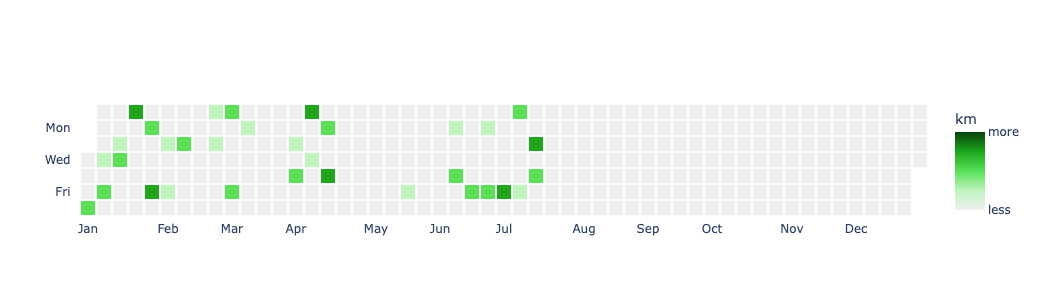

In [279]:
# for the values we want to show
z_matrix = new.pivot(index="github_weekday", columns="calendar_week", values="distance_label")
# for the date that we need for the labels when hovering
label_matrix = new.pivot(index="github_weekday", columns="calendar_week", values="hover_label")
label_matrix_str = label_matrix.astype(str).values 

# Weekday labels
weekday_labels = ["","Mon  ","","Wed  ","","Fri  ",""] # add whitespacd

# number of green tones
num_green = 4
custom_colorscale = custom_green_scale(num_green)
# labels for colorscale
lc = ['']* (num_green + 1)
lc[0] = 'less'
lc[-1] = 'more'

fig = go.Figure(go.Heatmap(
    z=z_matrix.values,                   # 2D data matrix
    x=z_matrix.columns,                  # weeks on x-axis
    y=z_matrix.index,    
    zmax = num_green,
    zmin = 0,
    colorscale=custom_colorscale,
    xgap=2, ygap=2,                      # add spacing between cells
    colorbar = dict(
        title= "km",           # ✅ Title of the legend
        tickvals= list(range(num_green + 1)),  # ✅ Where to place ticks
        ticktext= lc  # ✅ Custom labels
    ),
    hoverongaps=False,
    text=label_matrix_str,    
    hovertemplate=(" %{text}<br>" +          # use the date string here
                   "<extra></extra>"  # hides trace name box
)))

# Make cells square
fig.update_yaxes(
    scaleanchor="x",     # enforce square aspect ratio
    autorange='reversed', # reverse to match GitHub style
    tickmode="array",
    tickvals=list(range(7)),
    range=[-0.5, 6.5],                      # always show 7 rows
    ticktext=weekday_labels,
)


# Label only some weeks with months
tickvals = list(labels.calendar_week)
ticktext = list(labels.month)

fig.update_xaxes(
    tickvals=tickvals,
    ticktext=ticktext
)

fig.update_layout(
    plot_bgcolor='white',        # inside plot area
    #paper_bgcolor='lightgray',
    #margin=dict(l=60, r=20, t=40, b=10),
    width = 1000,
    height = 300
)

fig.show()

## Lets work on a good binning for our color scale!


In [605]:
run_df.head()

,date,distance_km,duration_min
0,2025-01-04,4.01524,29.859916
1,2025-01-08,2.66962,20.064484
2,2025-01-10,3.87244,30.039583
3,2025-01-14,2.77210,21.297249
4,2025-01-15,4.10387,30.036932


In [609]:
import seaborn as sns
import matplotlib.pyplot as plt

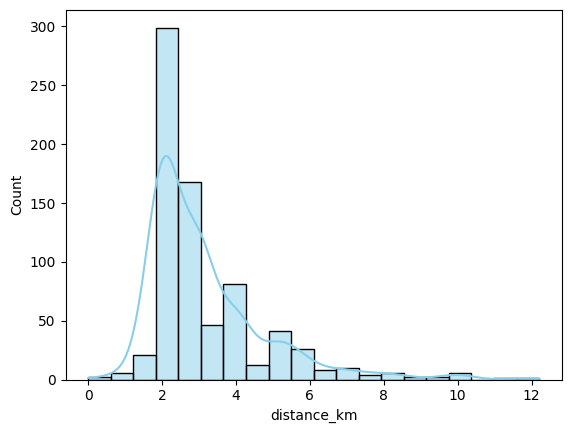

In [632]:
sns.histplot(run_df, x='distance_km', bins=20, kde=True, color="skyblue")
plt.show()

In [635]:
run_df.distance_km.round().value_counts()

distance_km
2.0     315
3.0     200
4.0      96
5.0      50
6.0      29
7.0      15
1.0      14
8.0       8
10.0      8
9.0       3
0.0       2
12.0      2
Name: count, dtype: int64

In [636]:
# 5 bins auswaehlen
# bin 1: bis 3k (gerundet natuerlich)
# bin 2: bis 5k
# bin 3: bis 7k
# bin 4: bis 9k
# bin 5: ab 10k

In [ ]:
# do we want a way to filter for a particular year?